In [51]:

%pip install pycaret

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from pycaret.regression import *
import pandas as pd
data = pd.read_csv('csv\pm25_new2.csv')
data = data.drop(['stationID'], axis=1, inplace=False)
data['DATETIMEDATA'] = pd.to_datetime(data['DATETIMEDATA'])

s = setup(data, target = 'PM25', session_id = 123, date_features=['DATETIMEDATA'], normalize=True)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(2136, 7)"
4,Transformed data shape,"(2136, 9)"
5,Transformed train set shape,"(1495, 9)"
6,Transformed test set shape,"(641, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


In [53]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.9534,14.8725,3.8334,0.4208,0.2138,0.1910,0.0650
lightgbm,Light Gradient Boosting Machine,2.9749,15.1371,3.8674,0.4128,0.2184,0.1938,0.0920
et,Extra Trees Regressor,2.9729,15.4417,3.9110,0.3963,0.2182,0.1918,0.0570
gbr,Gradient Boosting Regressor,3.1150,16.2811,4.0132,0.3682,0.2278,0.2044,0.0220
knn,K Neighbors Regressor,3.3154,18.8279,4.3153,0.2663,0.2413,0.2142,0.0130
ada,AdaBoost Regressor,3.6001,20.3654,4.4958,0.2036,0.2615,0.2511,0.0190
lr,Linear Regression,3.5954,21.5998,4.6304,0.1616,0.2689,0.2445,0.4810
lar,Least Angle Regression,3.5954,21.5998,4.6304,0.1616,0.2689,0.2445,0.0080
ridge,Ridge Regression,3.6005,21.6270,4.6332,0.1607,0.2690,0.2449,0.0100
br,Bayesian Ridge,3.6011,21.6391,4.6346,0.1602,0.2691,0.2449,0.0080


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [62]:

model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7513,12.0705,3.4743,0.5078,0.2059,0.1827
1,3.0926,15.4452,3.9300,0.4259,0.2171,0.1957
2,3.0360,15.2855,3.9097,0.3549,0.2169,0.1929
3,3.0218,15.2535,3.9056,0.3016,0.2242,0.1983
4,2.6149,10.3005,3.2094,0.5739,0.1971,0.1844
5,2.7014,11.4747,3.3874,0.4618,0.1846,0.1680
6,3.6192,23.0989,4.8061,0.3500,0.2483,0.2206
7,2.8366,13.8108,3.7163,0.4489,0.2162,0.1887
8,2.9581,15.0665,3.8816,0.2499,0.2125,0.1915


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9625,13.4953,3.6736,0.4497,0.2186,0.1988
1,3.1114,15.8768,3.9846,0.4098,0.2232,0.1988
2,2.9682,14.6734,3.8306,0.3807,0.2156,0.1934
3,3.0304,15.4484,3.9304,0.2926,0.2272,0.1997
4,2.7138,11.4745,3.3874,0.5253,0.2106,0.1948
5,2.6707,11.1567,3.3402,0.4767,0.1854,0.1685
6,3.6650,24.4873,4.9485,0.3110,0.2620,0.2278
7,2.9960,14.7385,3.8391,0.4119,0.2214,0.1971
8,3.0311,14.8395,3.8522,0.2612,0.2172,0.1982


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [65]:
ensemble_tuned_model = ensemble_model(tuned_model, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8049,12.2774,3.5039,0.4994,0.2071,0.1862
1,3.1384,15.8027,3.9753,0.4126,0.2205,0.1998
2,2.9634,14.6112,3.8225,0.3834,0.2109,0.1887
3,3.0111,14.9004,3.8601,0.3177,0.2212,0.1975
4,2.6130,10.7446,3.2779,0.5555,0.2033,0.1872
5,2.6478,10.9923,3.3155,0.4844,0.1830,0.1664
6,3.5706,23.5033,4.8480,0.3387,0.2505,0.2183
7,2.9178,13.8277,3.7186,0.4482,0.2165,0.1928
8,2.9438,14.3114,3.7830,0.2875,0.2094,0.1916


In [66]:
compare_best_model = compare_models(include=[ensemble_tuned_model])

In [70]:
lastest_date = data['DATETIMEDATA'].max()
start_date = lastest_date + pd.DateOffset(hours=1)
end_date = start_date + pd.DateOffset(days=30, hours=23)
next_week = pd.date_range(start=start_date, end=end_date, freq='D')


next_week_data = pd.DataFrame({'DATETIMEDATA': next_week})


next_week_data['O3'] = data['O3'].mean()
next_week_data['WS'] = data['WS'].mean()
next_week_data['TEMP'] = data['TEMP'].mean()
next_week_data['RH'] = data['RH'].mean()
next_week_data['WD'] = data['WD'].mean()

model_predictions = predict_model(compare_best_model, data=next_week_data)
predict_oneweek_data = pd.DataFrame(model_predictions, columns=['DATETIMEDATA', 'prediction_label'])
predict_oneweek_data.to_csv('csv\predicted_pm25--5.csv', index=False)
print(predict_oneweek_data)

   DATETIMEDATA  prediction_label
0    2024-02-28         18.142800
1    2024-02-29         18.754600
2    2024-03-01         18.364800
3    2024-03-02         17.732400
4    2024-03-03         18.174600
5    2024-03-04         21.072700
6    2024-03-05         20.947500
7    2024-03-06         20.022400
8    2024-03-07         20.142900
9    2024-03-08         19.938000
10   2024-03-09         20.375500
11   2024-03-10         20.629500
12   2024-03-11         20.875900
13   2024-03-12         21.221500
14   2024-03-13         20.945400
15   2024-03-14         20.472000
16   2024-03-15         19.313900
17   2024-03-16         19.287000
18   2024-03-17         19.372700
19   2024-03-18         18.081500
20   2024-03-19         16.282864
21   2024-03-20         15.978658
22   2024-03-21         14.943395
23   2024-03-22         12.592559
24   2024-03-23         12.710200
25   2024-03-24         13.301500
26   2024-03-25         14.876400
27   2024-03-26         17.536500
28   2024-03-2

In [71]:
save_model(compare_best_model, 'predict_PM2.5')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['DATETIMEDATA'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['O3', 'WS', 'TEMP', 'RH', 'WD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  BaggingRegressor(estimator=RandomForestRegressor(n_jobs=-1,
                                                                   random_state=123),
                                   random_state=123))]),
 'predict_PM2.5.pkl')

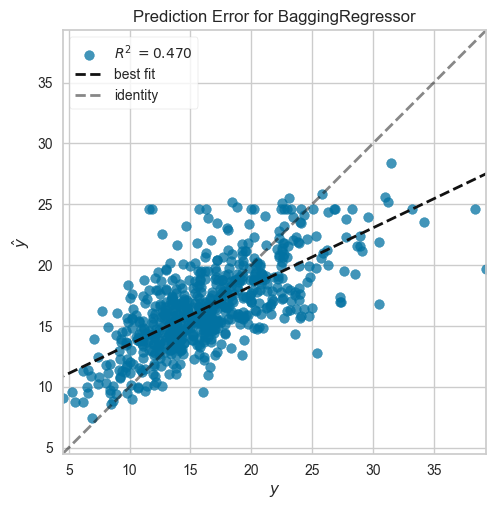

In [68]:
plot_model(compare_best_model, plot = 'error')